### <CENTER><h1><u>Clustering + KNN to Predict Online Purchases</u></CENTER></h1>

<br>

<CENTER>(TEAM CONTRIBUTORS: CHAITANYA DEVARSHI, SHASHANK SHEKHAR, BITTERLEIN KONNOTH BIJU)</CENTER>

----

===================================================================================================================

<h2><u>Content</u></h2>

1. [Introduction](#1.-Introduction)

  1.1 [Problem Statement](#1.1-Problem-Statement)
  
  1.2 [Methodology](#1.2-Methodology)
  

2. [Data Loading & Preparation](#2.-Data-Loading-&-Preparation)

  2.1 [Read the Data](#2.1-Read-the-Data)
  

3. [EDA](#3.-Exploratory-Data-Analysis)

  3.1 [Missing Values](#3.1-Missing-Values)
  
  3.2 [Univariate](#3.2-Univariate-Analysis)
  
   - 3.2.1 [For numeric features](#3.2.1-Univariate-Analysis-for-numeric-features)
     
   - 3.2.2 [For Binary features](#3.2.2-Univariate-Analysis-for-Binary-features)
     
  3.3 [Bivariate](#3.3-Bivariate-Analysis)
  
  3.4 [Multivariate](#3.4-Multivariate-Analysis)


4. [Data Cleaning](#4.-Data-Cleaning)

  4.1 [Handling Outliers](#4.1-Handling-Outliers)

  4.2 [Handling Skewness](#4.2-Handling-Skewness)


5. [Prepped Data Review](#5.-Prepped-Data-Review)


6. [Dimensionality Reduction](#6.-Dimensionality-Reduction)

  6.1 [Variance Threshold](#6.1-Variance-Threshold)


7. [Cluster Modeling](#7.-Cluster-Modeling)

  7.1 [Hierarchical Clustering](#7.1-Hierarchical-Clustering)
  
  7.2 [K-Means Clustering](#7.2-K-Means-Clustering)
  
  
8. [Model Selection](#8.-Model-Selection)


9. [Clustering Output vs. Actual Labels](#9.-Clustering-Output-vs.-Actual-Labels)


10. [KNN Modeling](#10.-KNN-Modeling)


11. [Select Models](#11.-Select-Models)


12. [Clustering vs. KNN Output](#12.-Clustering-vs.-KNN-Output)


[Conclusion](#Conclusion)


===================================================================================================================

## 1. Introduction

----

<b> [Back to Content](#Content) </b>

## 1.1 Problem Statement

----

<b> [Back to Content](#Content) </b>

## 1.2 Methodology

----

<b> [Back to Content](#Content) </b>

## 2. Data Loading & Preparation

In [73]:
# Importing basic Libraries.

import pandas as pd 
import numpy as np

# Importing Libraries for statistical analysis.

import statsmodels.api as sm
from scipy import stats

# Importing Libraries for machine learning models.

import sklearn
from sklearn import metrics
import imblearn
from imblearn.metrics import specificity_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from sklearn.feature_selection import VarianceThreshold

# Importing Libraries for plotting the graphs.

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Importing Libraries for Standarising and Normalising.

from sklearn.preprocessing import StandardScaler

# Import Library for PCA

from sklearn.decomposition import PCA

# Import missingno library for checking on missing values.

import missingno as msno

# Importing train_test_split .

from sklearn.model_selection import train_test_split, cross_val_score, KFold

# Importing Libraries for Forward elemination.

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster.silhouette import (
    SilhouetteVisualizer,
)

# Importing filterwarnings from warnings to ignore warnings.

import warnings
warnings.filterwarnings("ignore")

----

<b> [Back to Content](#Content) </b>

### 2.1 Read the Data

In [2]:
# Loading the data from the github repository DAV-6150.

df = pd.read_csv("https://raw.githubusercontent.com/bitterlein-biju/DAV-6150-/refs/heads/main/Project2_Data.csv")
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.00,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,May,1,1,1,2,New_Visitor,True
1,0,0.00,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,Mar,2,2,4,2,Returning_Visitor,False
2,4,37.50,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,Nov,2,2,9,2,New_Visitor,False
3,4,115.70,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,Nov,1,1,2,3,Returning_Visitor,False
4,1,60.00,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,May,2,2,3,4,Returning_Visitor,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,148.00,0,0.0,8,292.500000,0.000000,0.027273,0.000000,0.0,Mar,2,2,1,3,Returning_Visitor,True
12326,1,9.00,1,29.5,23,1157.583333,0.007692,0.053846,0.000000,0.0,Nov,2,2,7,2,Returning_Visitor,False
12327,0,0.00,0,0.0,91,4157.633333,0.010000,0.028013,0.000000,0.0,Jul,2,2,1,13,Returning_Visitor,False
12328,0,0.00,0,0.0,38,1417.666667,0.016117,0.048718,0.000000,1.0,May,2,6,3,6,Returning_Visitor,True


In [3]:
# Identifying how many rows and columns the dataframe consist of.

df.shape

(12330, 17)

In [4]:
# Getting a concise summary of the DataFrame .

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

----

<b> [Back to Content](#Content) </b>

## 3. Exploratory Data Analysis

In [5]:
# Checking columns names.

df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')

In [6]:
#correcting datatypes
#converting the respective datatype accordingly 
df[['OperatingSystems', 'Browser', 'Region', 'Weekend', 'TrafficType']] = df[['OperatingSystems', 'Browser', 'Region', 'Weekend', 'TrafficType']].astype('object')



In [7]:
# sanity check 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

In [8]:
# Checking for null values.

df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

-  There are no nulls present.

In [9]:
# Checking the duplicate columns.

count_duplicate = df.duplicated().sum()

print(f"Number of duplicate rows :",count_duplicate)

Number of duplicate rows : 125


- There are 125 duplicate rows in the whole dataset, it should be removed before EDA.

In [10]:
# Removing the duplicate rows.

df = df[df.duplicated() == False]

# Checking the shape after removing the duplicate rows.
df.shape

(12205, 17)

We are removing the duplicates because 125 rows is a negligible count compared to the total number of rows in the dataset.

----

<b> [Back to Content](#Content) </b>

### 3.2 Univariate Analysis

In [11]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,8,222.000000,0.000000,0.028571,53.474571,0.0,May,1,1,1,2,New_Visitor,True
1,0,0.0,0,0.0,14,1037.500000,0.014286,0.047619,0.000000,0.0,Mar,2,2,4,2,Returning_Visitor,False
2,4,37.5,2,82.0,4,96.625000,0.000000,0.017500,0.000000,0.0,Nov,2,2,9,2,New_Visitor,False
3,4,115.7,0,0.0,16,655.383333,0.000000,0.012037,0.000000,0.0,Nov,1,1,2,3,Returning_Visitor,False
4,1,60.0,1,15.0,26,670.166667,0.000000,0.003846,0.000000,0.0,May,2,2,3,4,Returning_Visitor,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  object 
 12  Browser                  12205 non-null  object 
 13  Region                   12205 non-null  object 
 14  TrafficType              12

----

<b> [Back to Content](#Content) </b>

### 3.2.1 For Numeric Features

In [13]:
# Create function to plot dist and box plot for all the numeric features. 

def box_dist_plot(df , column):
    
    
    """
    
    This function is to plot box-plot and distribution-plot for a given column, 
    column's median value, with count and percentage of null values. 
    
    Parameters :-
        df : Dataframe           # df contains Dataframe.
        column : str             # Column name which is to be ploted.
    
    """
    
    plt.style.use('ggplot')  
    
    plt.figure(figsize=(18, 7))

    # Box plot.
    plt.subplot(121)
    sns.boxplot(y = df[column])  # Create box plot
    plt.title(f'Box Plot of : {column}')

    # Distribution plot.
    plt.subplot(122)
    sns.histplot(df[column], bins=30, kde=True)  # Create histogram with KDE
    plt.title(f'Distribution Plot of : {column}')

    # Adjusting the layout.
    plt.tight_layout() 

    plt.show()  

    # To print statistics.
    print(df[column].describe())
    print('Median :', df[column].median())
    print()
    print('Total Number of null values :', df[column].isnull().sum(), 'count,', 
          round(df[column].isnull().mean() * 100, 2), '%')

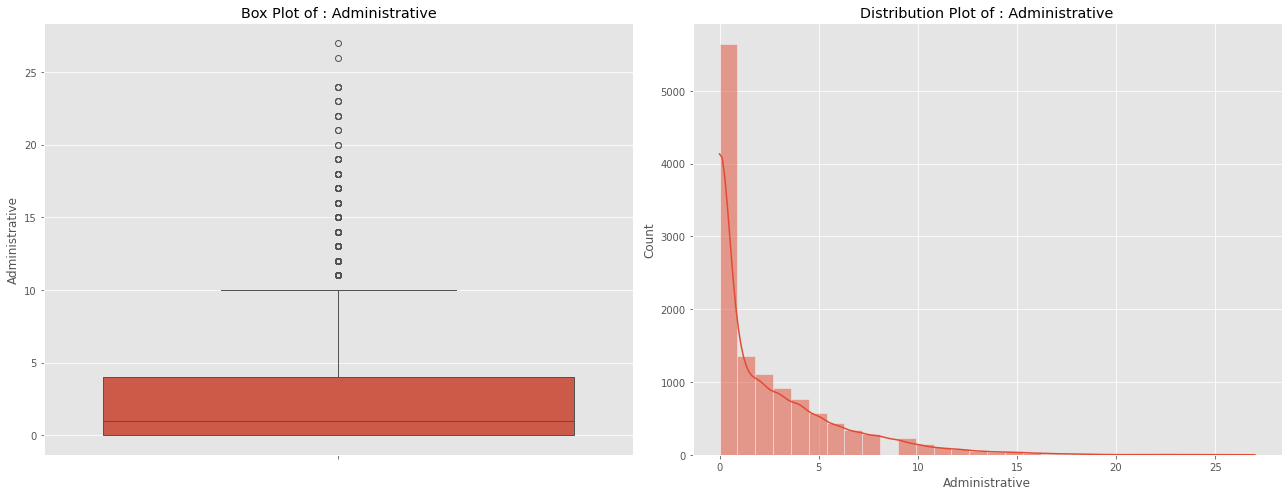

count    12205.000000
mean         2.338878
std          3.330436
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         27.000000
Name: Administrative, dtype: float64
Median : 1.0

Total Number of null values : 0 count, 0.0 %


In [14]:
box_dist_plot(df,'Administrative')

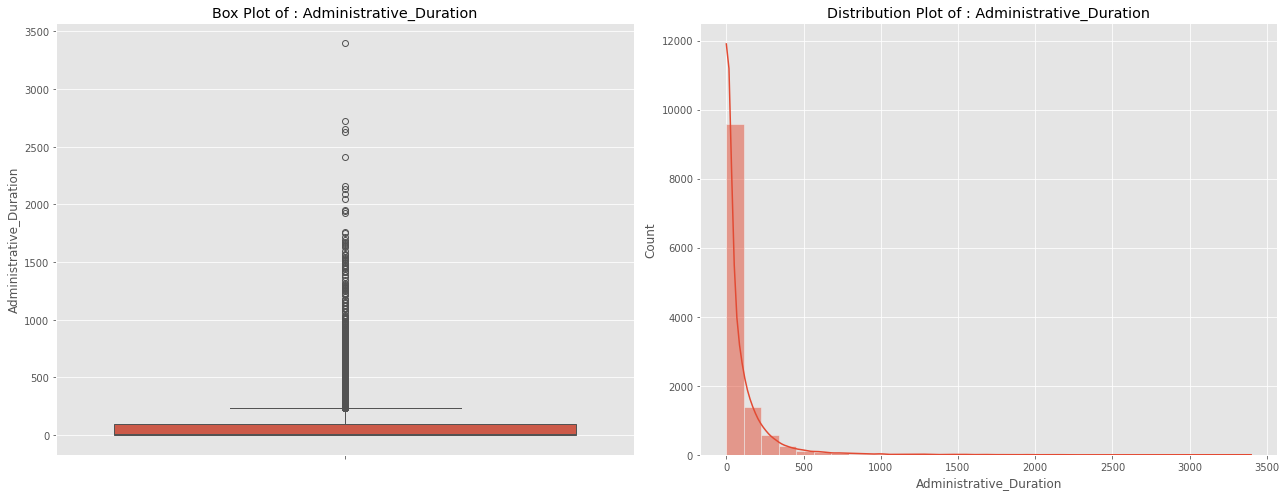

count    12205.000000
mean        81.646331
std        177.491845
min          0.000000
25%          0.000000
50%          9.000000
75%         94.700000
max       3398.750000
Name: Administrative_Duration, dtype: float64
Median : 9.0

Total Number of null values : 0 count, 0.0 %


In [15]:
box_dist_plot(df,'Administrative_Duration')

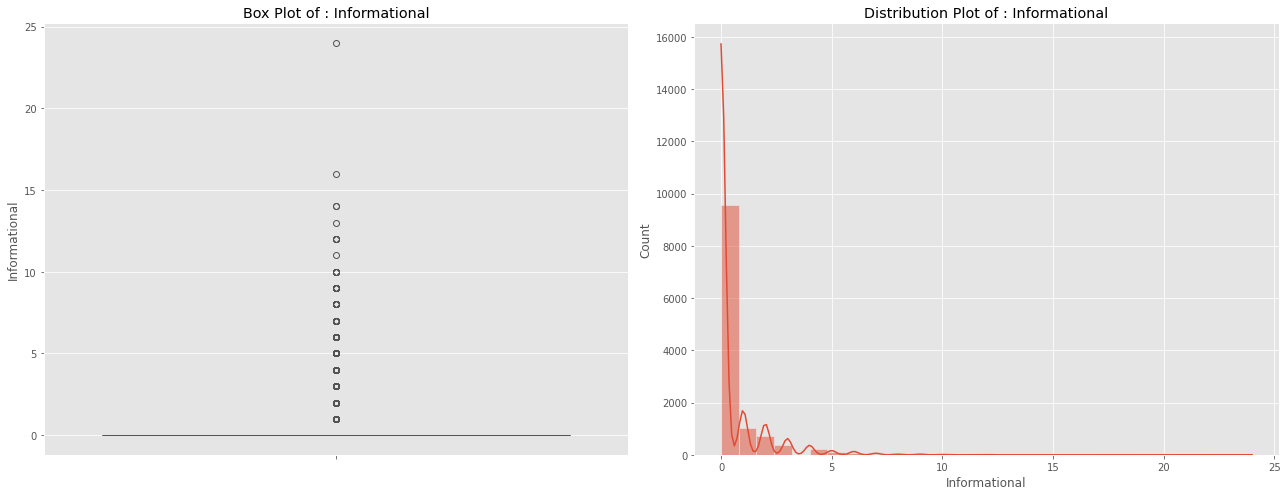

count    12205.000000
mean         0.508726
std          1.275617
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         24.000000
Name: Informational, dtype: float64
Median : 0.0

Total Number of null values : 0 count, 0.0 %


In [16]:
box_dist_plot(df,'Informational')

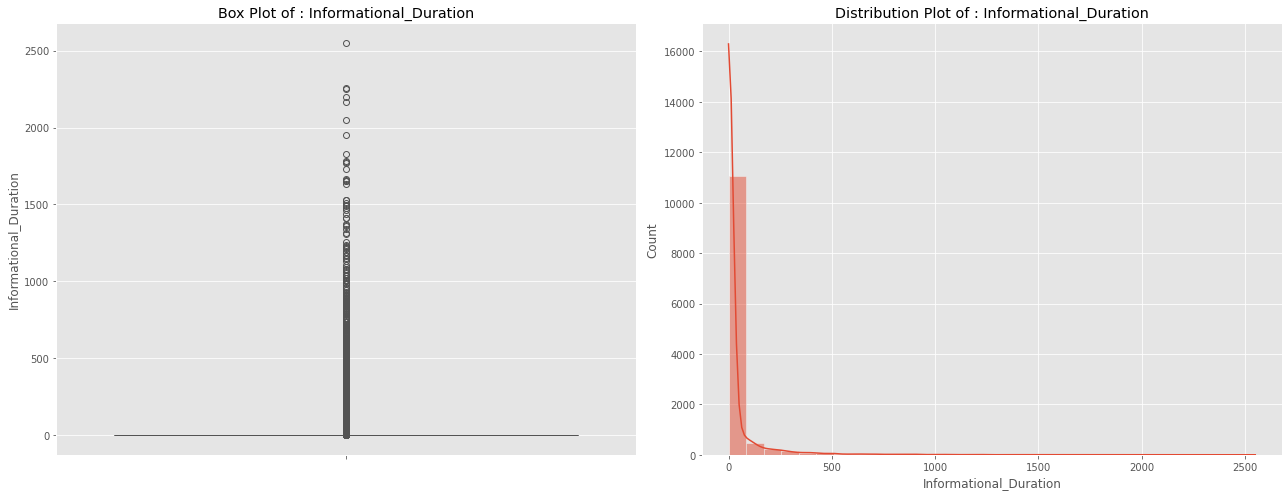

count    12205.000000
mean        34.825454
std        141.424807
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2549.375000
Name: Informational_Duration, dtype: float64
Median : 0.0

Total Number of null values : 0 count, 0.0 %


In [17]:
box_dist_plot(df,'Informational_Duration')

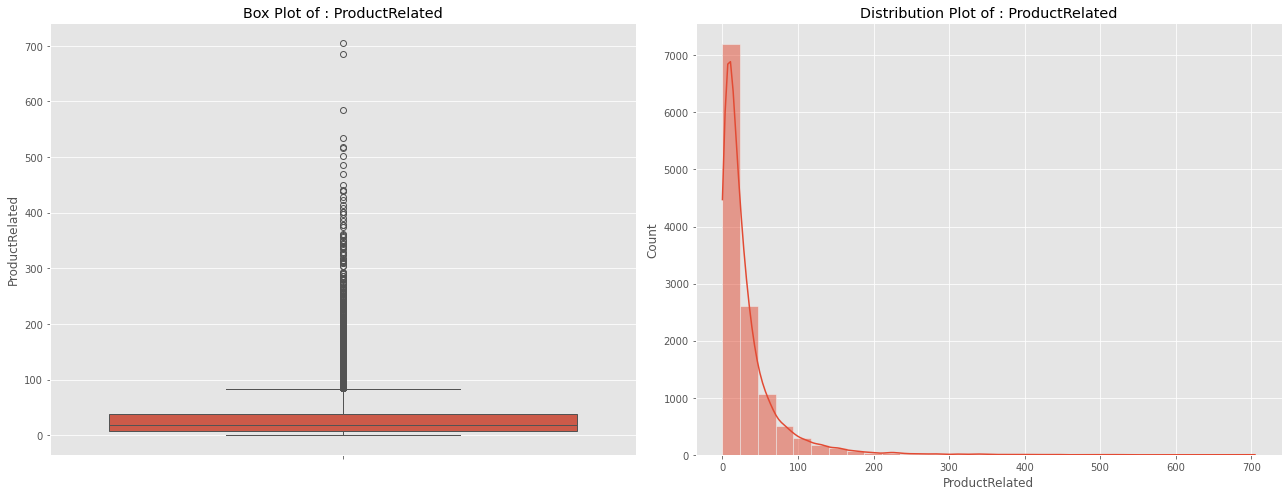

count    12205.000000
mean        32.045637
std         44.593649
min          0.000000
25%          8.000000
50%         18.000000
75%         38.000000
max        705.000000
Name: ProductRelated, dtype: float64
Median : 18.0

Total Number of null values : 0 count, 0.0 %


In [18]:
box_dist_plot(df,'ProductRelated')

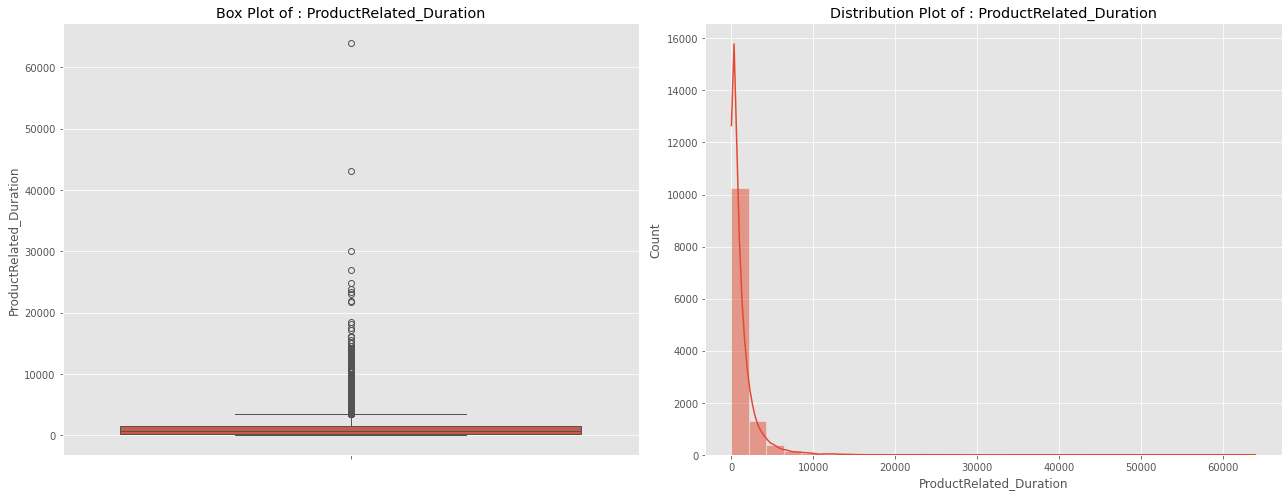

count    12205.000000
mean      1206.982457
std       1919.601400
min          0.000000
25%        193.000000
50%        608.942857
75%       1477.154762
max      63973.522230
Name: ProductRelated_Duration, dtype: float64
Median : 608.9428571

Total Number of null values : 0 count, 0.0 %


In [19]:
box_dist_plot(df,'ProductRelated_Duration')

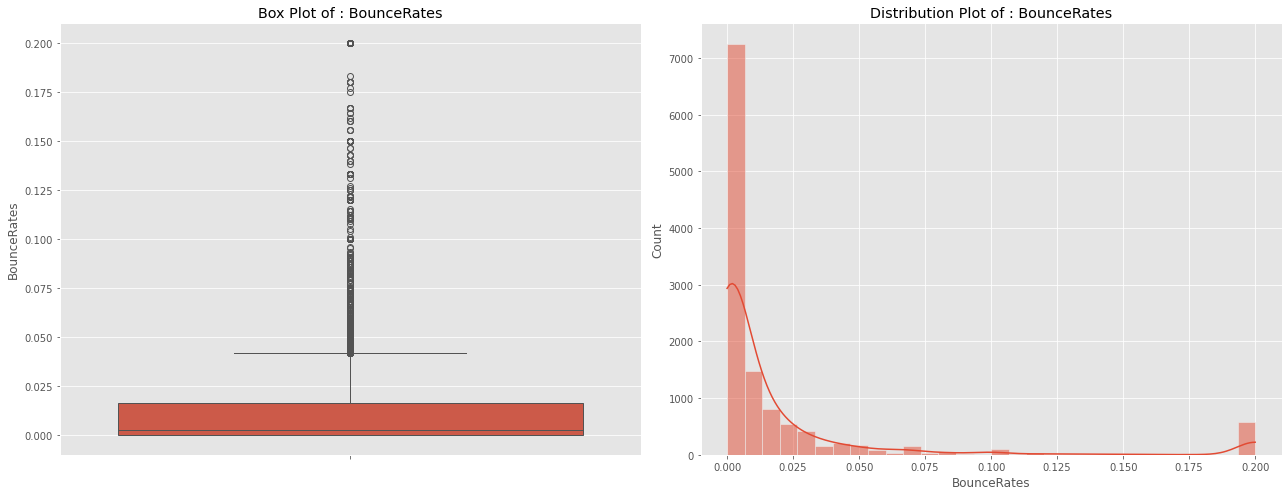

count    12205.000000
mean         0.020370
std          0.045255
min          0.000000
25%          0.000000
50%          0.002899
75%          0.016667
max          0.200000
Name: BounceRates, dtype: float64
Median : 0.002898551

Total Number of null values : 0 count, 0.0 %


In [20]:
box_dist_plot(df,'BounceRates')

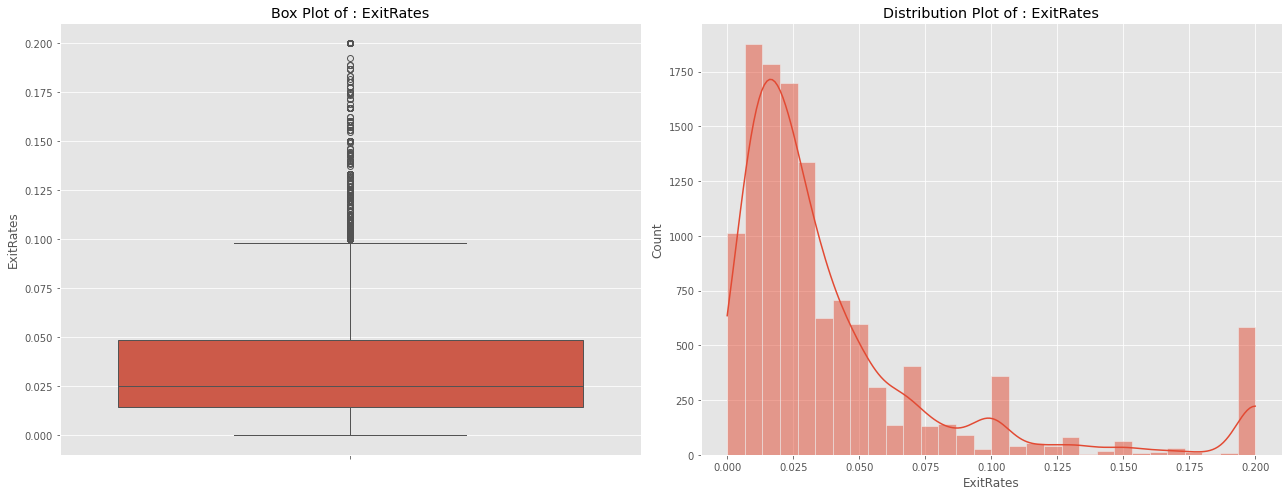

count    12205.000000
mean         0.041466
std          0.046163
min          0.000000
25%          0.014231
50%          0.025000
75%          0.048529
max          0.200000
Name: ExitRates, dtype: float64
Median : 0.025

Total Number of null values : 0 count, 0.0 %


In [21]:
box_dist_plot(df,'ExitRates')

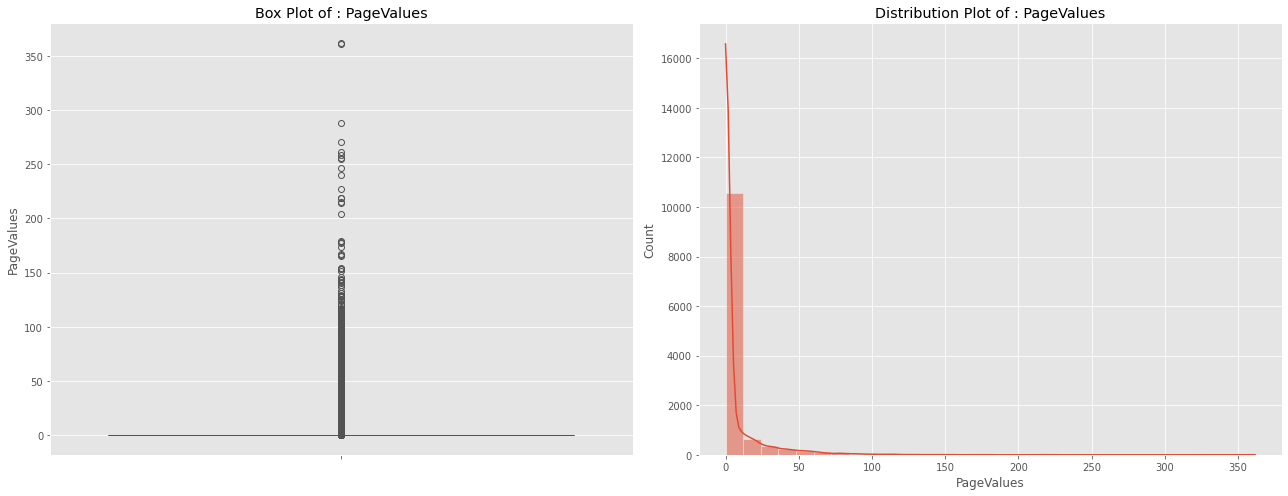

count    12205.000000
mean         5.949574
std         18.653671
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64
Median : 0.0

Total Number of null values : 0 count, 0.0 %


In [22]:
box_dist_plot(df,'PageValues')

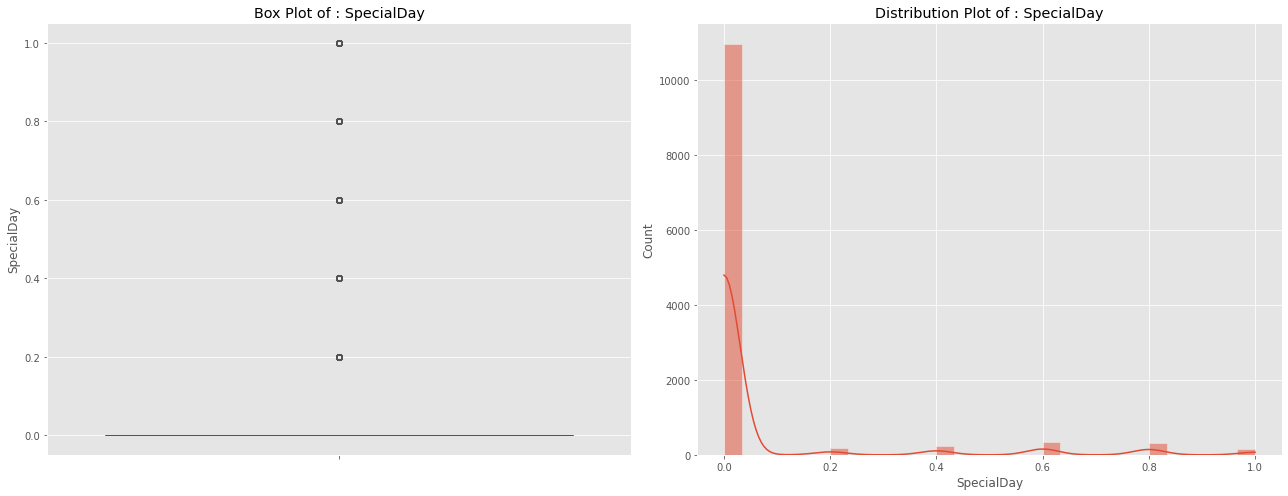

count    12205.000000
mean         0.061942
std          0.199666
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: SpecialDay, dtype: float64
Median : 0.0

Total Number of null values : 0 count, 0.0 %


In [23]:
box_dist_plot(df,'SpecialDay')

----

<b> [Back to Content](#Content) </b>

### 3.2.2 For Categorical Features

In [24]:
# Generates a count plot and displays the count of each category for a specified column in the dataframe.

def plot_category_counts(df, column):
    
    """
    A function to plot a countplot and  displays the count of each category 
    for a specified column in the dataframe.
    
        column : str
        The name of the categorical column to plot and count.
    """

    # Count plot for the specified column.
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, palette="viridis")
    

    # Set plot labels and title
    plt.xlabel(column)  
    plt.ylabel('Count')     
    plt.xticks(rotation=90, ha='right')
    plt.title(f'Count of {column}')

    # Display the plot
    plt.show()

    # Display count of each category
    counts = df[column].value_counts()
    print(f"\nCounts for {column}:\n{counts}")

    #For unique count of input
    unique_count = df[column].nunique()
    print(f"\nUnique for {column}:\n{unique_count}")

<ipython-input-24-17d38957b7a4>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis")


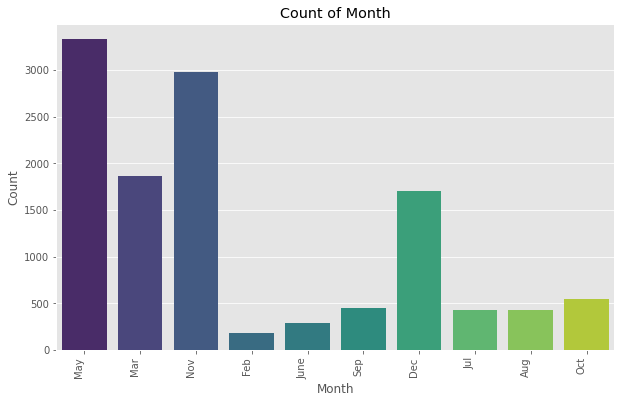


Counts for Month:
Month
May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: count, dtype: int64

Unique for Month:
10


In [25]:
# calling the function
plot_category_counts(df, 'Month')

The Month column is comprised of 10 distinct categorical values, with the most frequently occurring value being May

<ipython-input-24-17d38957b7a4>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis")


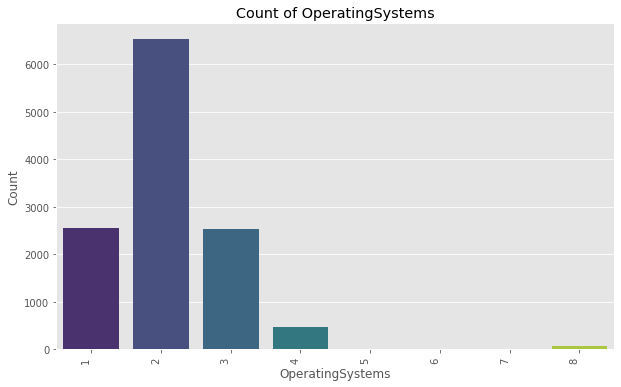


Counts for OperatingSystems:
OperatingSystems
2    6541
1    2549
3    2530
4     478
8      75
6      19
7       7
5       6
Name: count, dtype: int64

Unique for OperatingSystems:
8


In [26]:
# calling the function
plot_category_counts(df, 'OperatingSystems')

The operating systems has 8 unique values in which 2 is the highest occuring value 

<ipython-input-24-17d38957b7a4>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis")


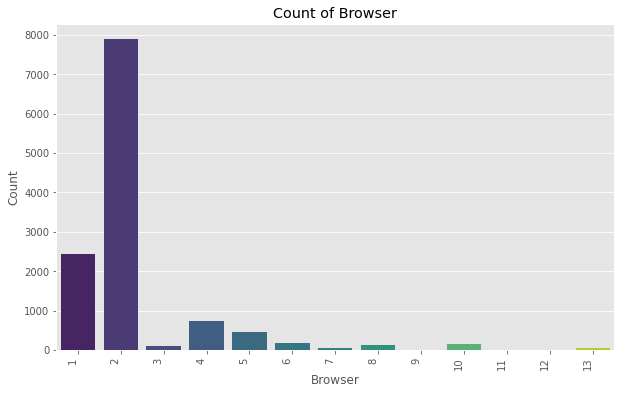


Counts for Browser:
Browser
2     7883
1     2427
4      731
5      465
6      174
10     163
8      135
3      105
13      56
7       49
12      10
11       6
9        1
Name: count, dtype: int64

Unique for Browser:
13


In [27]:
# calling the function
plot_category_counts(df, 'Browser')

The browser column has 13 distinct  values in which 2 being the most occuring value and 1 is the second most occuring value 

<ipython-input-24-17d38957b7a4>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis")


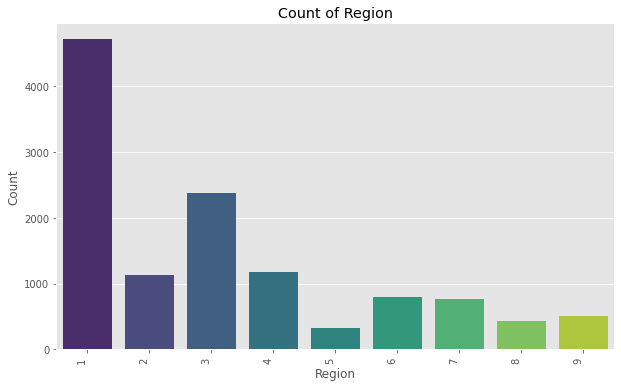


Counts for Region:
Region
1    4714
3    2379
4    1171
2    1128
6     801
7     758
9     505
8     431
5     318
Name: count, dtype: int64

Unique for Region:
9


In [28]:
# calling the function
plot_category_counts(df, 'Region')

In this we can see that the region column has 9 distinct values in which number 1 region being the highest 

<ipython-input-24-17d38957b7a4>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis")


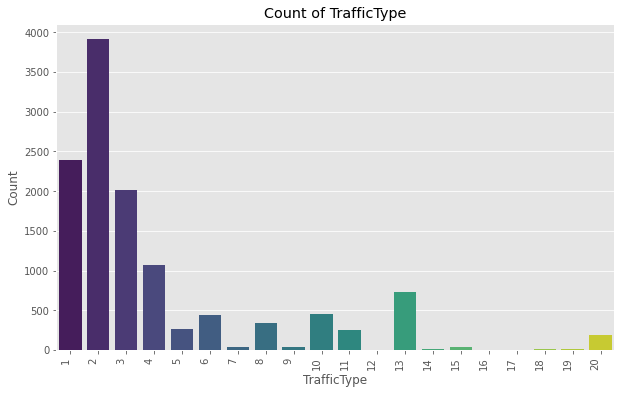


Counts for TrafficType:
TrafficType
2     3911
1     2388
3     2013
4     1066
13     728
10     450
6      443
8      343
5      260
11     247
20     193
9       41
7       40
15      37
19      17
14      13
18      10
16       3
12       1
17       1
Name: count, dtype: int64

Unique for TrafficType:
20


In [29]:
# calling the function
plot_category_counts(df, 'TrafficType')

The TrafficType column is consists  of 20 distinct categorical values, with the most majority  occurring value being '2'

<ipython-input-24-17d38957b7a4>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis")


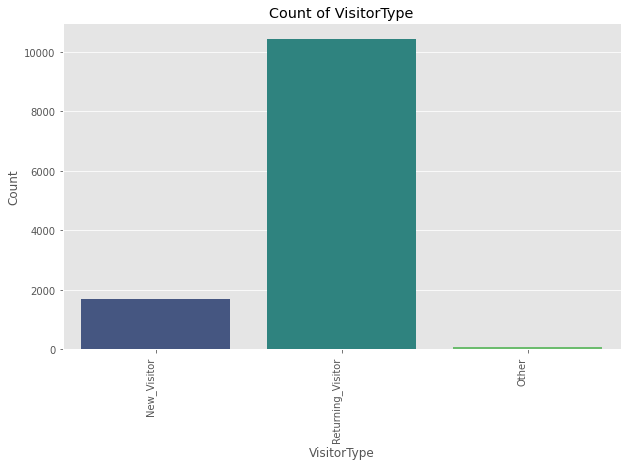


Counts for VisitorType:
VisitorType
Returning_Visitor    10431
New_Visitor           1693
Other                   81
Name: count, dtype: int64

Unique for VisitorType:
3


In [30]:
# calling the function
plot_category_counts(df, 'VisitorType')

From this we can observe that  VisitorType column is comprised of 3 distinct categorical values, with the most frequently occurring value being 'Returning_Visitor'

<ipython-input-24-17d38957b7a4>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis")


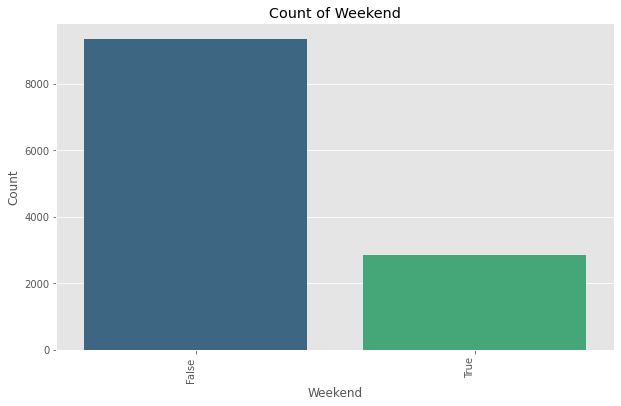


Counts for Weekend:
Weekend
False    9346
True     2859
Name: count, dtype: int64

Unique for Weekend:
2


In [31]:
# calling the function
plot_category_counts(df, 'Weekend')

The Weekend column is comprised of 2 distinct categorical values, with the most frequently occurring value being 'False'

----

<b> [Back to Content](#Content) </b>

### 3.3 Bivariate Analysis

----

<b> [Back to Content](#Content) </b>

### 3.4 Multivariate Analysis

----

<b> [Back to Content](#Content) </b>

## 4. Data Cleaning

In [32]:
# Check for missing values in each columns.

df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

----

<b> [Back to Content](#Content) </b>

### 4.1 Handling Outliers

In [33]:
numeric_colms = ['Administrative', 'Administrative_Duration', 'Informational', 
                 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
                 'BounceRates', 'ExitRates', 'PageValues','SpecialDay']

# Looping through numeric columns to get the lower and upper bound values.  
for col in numeric_colms:
    q1 = np.quantile(df[col], 0.25)
    q3 = np.quantile(df[col], 0.75)
    iqr = q3 - q1
    upper_bound = q3 + (1.5 * iqr)                 
    lower_bound = q1 - (1.5 * iqr)
    range = [lower_bound, upper_bound]
    print(f"range in {col}:",range)
    
    # checking the maximum value 
    max_value = df[col].max()
    print(f"The maximum value in {col} is: {max_value}")

range in Administrative: [-6.0, 10.0]
The maximum value in Administrative is: 27
range in Administrative_Duration: [-142.05, 236.75]
The maximum value in Administrative_Duration is: 3398.75
range in Informational: [0.0, 0.0]
The maximum value in Informational is: 24
range in Informational_Duration: [0.0, 0.0]
The maximum value in Informational_Duration is: 2549.375
range in ProductRelated: [-37.0, 83.0]
The maximum value in ProductRelated is: 705
range in ProductRelated_Duration: [-1733.2321429999997, 3403.3869049999994]
The maximum value in ProductRelated_Duration is: 63973.52223
range in BounceRates: [-0.0250000005, 0.041666667500000004]
The maximum value in BounceRates is: 0.2
range in ExitRates: [-0.0372166855, 0.0999770705]
The maximum value in ExitRates is: 0.2
range in PageValues: [0.0, 0.0]
The maximum value in PageValues is: 361.7637419
range in SpecialDay: [0.0, 0.0]
The maximum value in SpecialDay is: 1.0


have to check 

----

<b> [Back to Content](#Content) </b>

### 4.2 Handling Skewness

In [34]:
# Checking for negative value.

numeric_colms = ['Administrative', 'Administrative_Duration', 'Informational', 
                 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
                 'BounceRates', 'ExitRates', 'PageValues','SpecialDay']

negative_check = df[numeric_colms].apply(lambda x: (x < 0).any())

print(negative_check)

Administrative             False
Administrative_Duration    False
Informational              False
Informational_Duration     False
ProductRelated             False
ProductRelated_Duration    False
BounceRates                False
ExitRates                  False
PageValues                 False
SpecialDay                 False
dtype: bool


- All numeric attributes are non-negative.

In [35]:
# Checking for zero values.

zero_check = df[numeric_colms].apply(lambda x: (x == 0).any())

print(zero_check)

Administrative             True
Administrative_Duration    True
Informational              True
Informational_Duration     True
ProductRelated             True
ProductRelated_Duration    True
BounceRates                True
ExitRates                  True
PageValues                 True
SpecialDay                 True
dtype: bool


- All features above  have zero value.

In [36]:
# Applying Box-Cox transformation to each numeric columns for handeling the skewness.

for col in numeric_colms:
    
    # Increasing  values by 1 to handle zeros
    df[col] += 1
    
    # Performing Box-Cox transformation and save the lambda value
    fitted_data, fitted_lambda = stats.boxcox(df[col])
    
    # Replacing original column with transformed data
    df[col] = fitted_data
    
    #  Print lambda value for each column
    print(f"Lambda value for {col}: {fitted_lambda}")

<ipython-input-36-cb42b46a0df8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] += 1
<ipython-input-36-cb42b46a0df8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = fitted_data
<ipython-input-36-cb42b46a0df8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

Lambda value for Administrative: -0.4978377884043738
Lambda value for Administrative_Duration: -0.09708211070582673
Lambda value for Informational: -3.758539846509485
Lambda value for Informational_Duration: -1.0941001046108825
Lambda value for ProductRelated: 0.01392414898208312
Lambda value for ProductRelated_Duration: 0.2258272015680846
Lambda value for BounceRates: -39.08880451676156
Lambda value for ExitRates: -22.202489244222736
Lambda value for PageValues: -1.4314376016719708
Lambda value for SpecialDay: -20.913808806625255


<ipython-input-36-cb42b46a0df8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = fitted_data
<ipython-input-36-cb42b46a0df8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] += 1
<ipython-input-36-cb42b46a0df8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

----

<b> [Back to Content](#Content) </b>

## 5. Prepped Data Review

In [37]:
# Checkig the cleaned dataframe.

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.000000,0.000000,0.000000,0.000000,2.231181,10.587165,0.000000,0.020943,0.696313,0.0,May,1,1,1,2,New_Visitor,True
1,0.000000,0.000000,0.000000,0.000000,2.759755,16.824353,0.010888,0.029006,0.000000,0.0,Mar,2,2,4,2,Returning_Visitor,False
2,1.107243,3.073844,0.261778,0.906727,1.627607,8.031913,0.000000,0.014398,0.000000,0.0,Nov,2,2,9,2,New_Visitor,False
3,1.107243,3.811448,0.000000,0.000000,2.889841,14.732676,0.000000,0.010508,0.000000,0.0,Nov,1,1,2,3,Returning_Visitor,False
4,0.586200,3.389618,0.246402,0.869987,3.372633,14.829293,0.000000,0.003680,0.000000,0.0,May,2,2,3,4,Returning_Visitor,False


In [38]:
# Checking the shape of the df.

df.shape

(12205, 17)

In [39]:
# Checking every columns has the correct data types.

df.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems            object
Browser                     object
Region                      object
TrafficType                 object
VisitorType                 object
Weekend                     object
dtype: object

In [40]:
# Checking the descriptive statistics.

df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,0.545549,1.871537,0.055361,0.175757,2.976311,14.286909,0.006791,0.020970,0.148100,0.004877
std,0.546405,1.861436,0.105685,0.355224,1.153451,6.589923,0.008458,0.011577,0.277977,0.014445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.231181,10.122124,0.000000,0.012129,0.000000,0.000000
50%,0.586200,2.063377,0.000000,0.000000,3.005632,14.417775,0.002737,0.019008,0.000000,0.000000
75%,1.107243,3.685257,0.000000,0.000000,3.758614,18.587988,0.012175,0.029313,0.000000,0.000000
max,1.626335,5.622987,0.266059,0.913822,6.868516,49.467133,0.025562,0.044254,0.698447,0.047815


In [41]:
# Ensure that there are no duplicates.

df.duplicated().sum()

0

In [42]:
# Ensuring that there is no null value present.

df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

#### Ensuring Univariate

----

<b> [Back to Content](#Content) </b>

#### Ensuring Bivariate

----

<b> [Back to Content](#Content) </b>

#### Ensuring Multivariate 

----

<b> [Back to Content](#Content) </b>

## 6. Dimensionality Reduction

In [43]:
# Using get getdummy to convert categorical variable into machine recoganizable format.


dummy_cols_month = pd.get_dummies(df['Month'], prefix='month',drop_first= True).astype(int)
dummy_cols_visitor = (pd.get_dummies(df['VisitorType'], prefix='vistor_type', drop_first = True)).astype(int)
dummy_cols_OperatingSystems = (pd.get_dummies(df['OperatingSystems'], prefix='OperatingSystems', drop_first = True)).astype(int)
dummy_cols_Browser = (pd.get_dummies(df['Browser'], prefix='Browser', drop_first = True)).astype(int)
dummy_cols_Region = (pd.get_dummies(df['Region'], prefix='Region', drop_first = True)).astype(int)
dummy_cols_TrafficType = (pd.get_dummies(df['TrafficType'], prefix='TrafficType', drop_first = True)).astype(int)
dummy_cols_special_day = (pd.get_dummies(df['Weekend'], prefix='Weekend', drop_first = True)).astype(int)


In [44]:
# List of categorical columns to be dropped after creating dummy variables.

cats_cols = ['Month', 'VisitorType', 'OperatingSystems', 'Browser', 'Region', 'TrafficType','Weekend']
df.drop(columns=cats_cols, inplace=True)

<ipython-input-44-4a4c341aaa50>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=cats_cols, inplace=True)


In [45]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'],
      dtype='object')

In [46]:
# Standarise the numeric attributes.

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_std = std_scaler.fit_transform(df)

In [47]:
# Convert the nd array of X_std to a DataFrame with the desired column names
X_std = pd.DataFrame(X_std, columns=['Administrative', 'Administrative_Duration', 'Informational', 
                 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 
                 'BounceRates', 'ExitRates', 'PageValues','SpecialDay'])

X_std.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
0,-0.998474,-1.005468,-0.523851,-0.494799,-0.646027,-0.561448,-0.802948,-0.002360,1.972236,-0.33763
1,-0.998474,-1.005468,-0.523851,-0.494799,-0.187754,0.385065,0.484472,0.694170,-0.532801,-0.33763
2,1.028024,0.645929,1.953214,2.057857,-1.169325,-0.949215,-0.802948,-0.567724,-0.532801,-0.33763
3,1.028024,1.042201,-0.523851,-0.494799,-0.074970,0.067646,-0.802948,-0.903786,-0.532801,-0.33763
4,0.074401,0.815576,1.807721,1.954424,0.343610,0.082308,-0.802948,-1.493604,-0.532801,-0.33763


In [48]:
# Concatenate the original DataFrame with the one-hot encoded columns with the numeric standarised data.

X = pd.concat([X_std, dummy_cols_month, dummy_cols_visitor,dummy_cols_OperatingSystems, dummy_cols_Browser,
              dummy_cols_Region, dummy_cols_TrafficType,dummy_cols_special_day], axis=1)

X.head().columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'month_Dec',
       'month_Feb', 'month_Jul', 'month_June', 'month_Mar', 'month_May',
       'month_Nov', 'month_Oct', 'month_Sep', 'vistor_type_Other',
       'vistor_type_Returning_Visitor', 'OperatingSystems_2',
       'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_5',
       'OperatingSystems_6', 'OperatingSystems_7', 'OperatingSystems_8',
       'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6',
       'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10', 'Browser_11',
       'Browser_12', 'Browser_13', 'Region_2', 'Region_3', 'Region_4',
       'Region_5', 'Region_6', 'Region_7', 'Region_8', 'Region_9',
       'TrafficType_2', 'TrafficType_3', 'TrafficType_4', 'TrafficType_5',
       'TrafficType_6', 'TrafficType_7', 'TrafficType_8', 'TrafficType

In [49]:
# Checking the shape of dataframe having independent attributes.

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12328 entries, 0 to 12329
Data columns (total 68 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12205 non-null  float64
 1   Administrative_Duration        12205 non-null  float64
 2   Informational                  12205 non-null  float64
 3   Informational_Duration         12205 non-null  float64
 4   ProductRelated                 12205 non-null  float64
 5   ProductRelated_Duration        12205 non-null  float64
 6   BounceRates                    12205 non-null  float64
 7   ExitRates                      12205 non-null  float64
 8   PageValues                     12205 non-null  float64
 9   SpecialDay                     12205 non-null  float64
 10  month_Dec                      12205 non-null  float64
 11  month_Feb                      12205 non-null  float64
 12  month_Jul                      12205 non-null  floa

----

<b> [Back to Content](#Content) </b>

### 6.1 Variance Threshold

In [50]:
# Creating the VarianceThreshold object (remove features with variance below the threshold).

selector = VarianceThreshold(threshold=0.01)

# Fit the selector to the data
selector.fit(X)

selector.get_support()

# Get the list of featurs with low variance.
low_var_cols = [col for col in X.columns if col not in X.columns[selector.get_support()]]

print(f"Total number of attributes with Low Variance : {len(low_var_cols)}")

Total number of attributes with Low Variance : 20


In [51]:
# Dropping Low Variance attributes from X.

X_new = X.drop(low_var_cols, axis=1)

In [52]:
# Check for NaN values.

print("Number of NaN values in X_new : ", np.isnan(X_new).sum())

Number of NaN values in X_new :  Administrative                   123
Administrative_Duration          123
Informational                    123
Informational_Duration           123
ProductRelated                   123
ProductRelated_Duration          123
BounceRates                      123
ExitRates                        123
PageValues                       123
SpecialDay                       123
month_Dec                        123
month_Feb                        123
month_Jul                        123
month_June                       123
month_Mar                        123
month_May                        123
month_Nov                        123
month_Oct                        123
month_Sep                        123
vistor_type_Returning_Visitor    123
OperatingSystems_2               123
OperatingSystems_3               123
OperatingSystems_4               123
Browser_2                        123
Browser_4                        123
Browser_5                        123
Brows

In [53]:
# Drop rows with NaN values
X_new_cleaned = X_new.dropna()

----

<b> [Back to Content](#Content) </b>

## 7. Cluster Modeling

### 7.1 Hierarchical Clustering

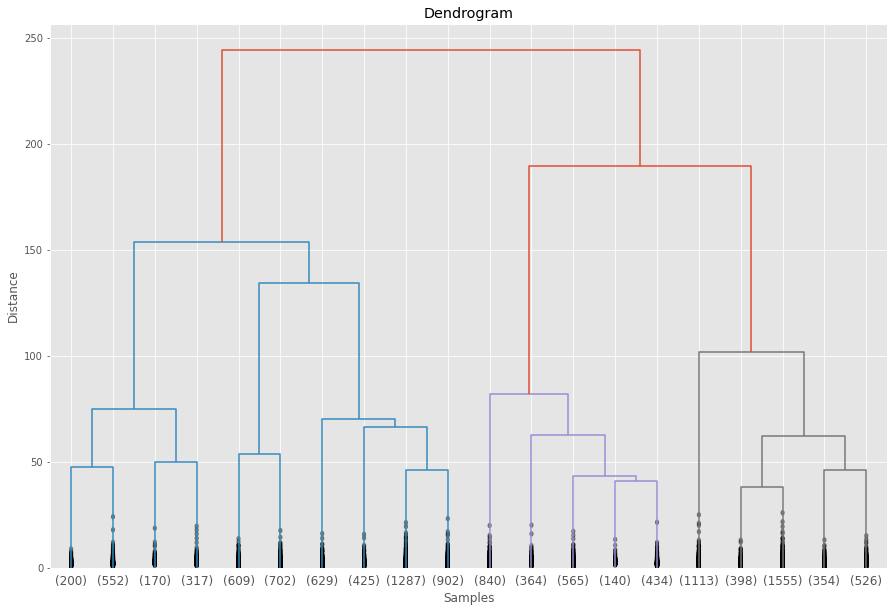

In [54]:
# ref:code from  MLPR by O'Reilly chapter 18 truncated dendrogram.

from scipy.cluster import hierarchy
    
fig ,ax = plt.subplots(figsize=(15,10))
dend = hierarchy.dendrogram(hierarchy.linkage(X_new_cleaned, method= "ward"), truncate_mode="lastp",p=20,
                           show_contracted = True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

- Based on general rule of selecting based on longest lines, thus 3 will be the optimal number of clusters.

### Elbow Plot

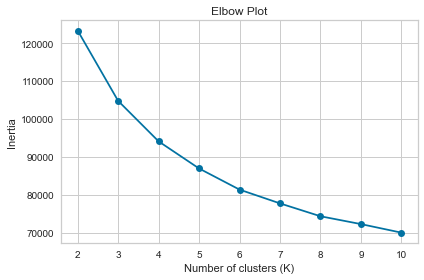

In [88]:
#ref:code from  MLPR by O'Reilly chapter 18 pg 278.

cluster_sizes = list(np.arange(2, 11))

# Empty lists for inertia.
inertias = []

# Iterate over each value of K.
for k in cluster_sizes:
    # Initialize KMeans with the current value of K
    k2 = KMeans(n_clusters=k, random_state=42)
    k2.fit(X_new_cleaned )
    
    # Calculate inertia
    inertias.append(k2.inertia_)

# Plot the inertia
plt.plot(cluster_sizes, inertias, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Plot')

plt.tight_layout()
plt.show()

### Silhouette plot

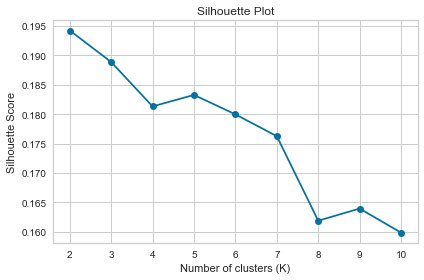

In [77]:
#ref:code from  MLPR by O'Reilly chapter 18 pg 278

cluster_sizes = list(np.arange(2, 11))

# Empty lists for silhouette scores and inertia
silhouette_scores = []

# Iterate over each value of K 
for k in cluster_sizes:
    # Initialize KMeans with the current value of K
    k2 = KMeans(n_clusters=k, random_state=42)
    k2.fit(X_new_cleaned )
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_new_cleaned , k2.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(cluster_sizes, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Plot')

plt.tight_layout()
plt.show()

IndexError: index 4 is out of bounds for axis 0 with size 4

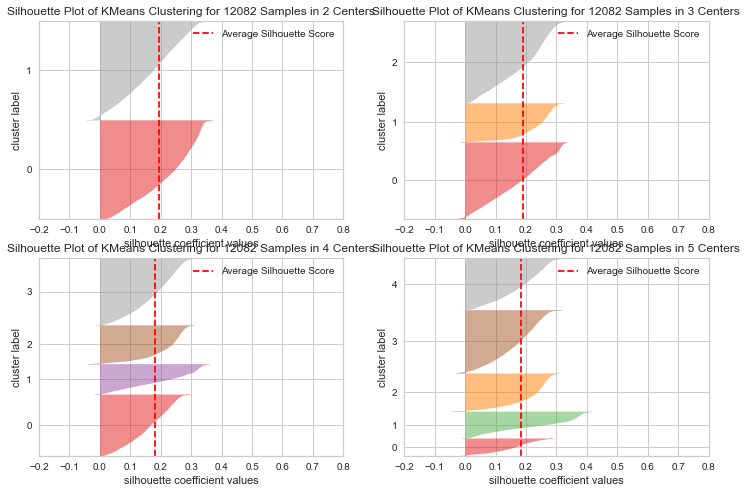

In [81]:
# From ml pocket reference chapter 18, to represent average silhouette score.

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.reshape(4)
for i, k in enumerate(list(np.arange(2, 8))):
    ax = axes[i]
    sil = SilhouetteVisualizer(
        KMeans(n_clusters=k, random_state=42),
        ax=ax,
    )
    sil.fit(X_new_cleaned)
    sil.finalize()
    ax.set_xlim(-0.2, 0.8)
plt.tight_layout()

----

<b> [Back to Content](#Content) </b>

### 7.2 K-Means Clustering

In [83]:
# Randomly selecting value of k for k_means clustering, but will veryfy with elbow and Silhouette Method furtherly.

from sklearn.cluster import (
    AgglomerativeClustering,
)
ag = AgglomerativeClustering(
    n_clusters=5,
    affinity="euclidean",
    linkage="ward",
)
ag.fit(X_new_cleaned)

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

----

<b> [Back to Content](#Content) </b>

### Elbow Plot

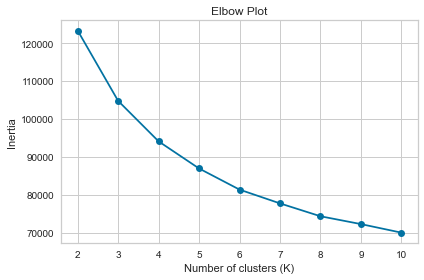

In [89]:
#ref:code from  MLPR by O'Reilly chapter 18 pg 278.

cluster_sizes = list(np.arange(2, 11))

# Empty lists for inertia.
inertias = []

# Iterate over each value of K.
for k in cluster_sizes:
    # Initialize KMeans with the current value of K
    k2 = KMeans(n_clusters=k, random_state=42)
    k2.fit(X_new_cleaned )
    
    # Calculate inertia
    inertias.append(k2.inertia_)

# Plot the inertia
plt.plot(cluster_sizes, inertias, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Plot')

plt.tight_layout()
plt.show()

----

<b> [Back to Content](#Content) </b>

### Silhouette plot

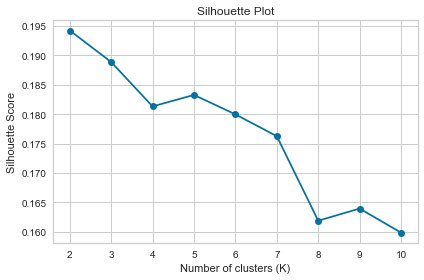

In [90]:
#ref:code from  MLPR by O'Reilly chapter 18 pg 278

cluster_sizes = list(np.arange(2, 11))

# Empty lists for silhouette scores and inertia
silhouette_scores = []

# Iterate over each value of K 
for k in cluster_sizes:
    # Initialize KMeans with the current value of K
    k2 = KMeans(n_clusters=k, random_state=42)
    k2.fit(X_new_cleaned )
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_new_cleaned , k2.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(cluster_sizes, silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Plot')

plt.tight_layout()
plt.show()

IndexError: index 4 is out of bounds for axis 0 with size 4

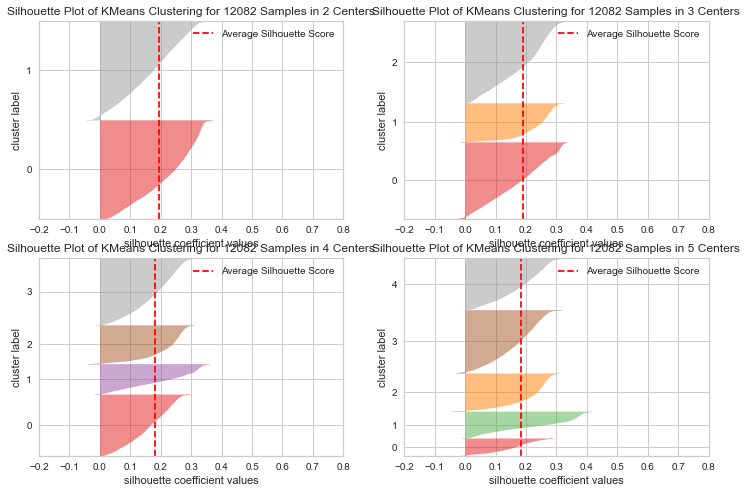

In [91]:
# From ml pocket reference chapter 18, to represent average silhouette score.

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.reshape(4)
for i, k in enumerate(list(np.arange(2, 8))):
    ax = axes[i]
    sil = SilhouetteVisualizer(
        KMeans(n_clusters=k, random_state=42),
        ax=ax,
    )
    sil.fit(X_new_cleaned)
    sil.finalize()
    ax.set_xlim(-0.2, 0.8)
plt.tight_layout()

----

<b> [Back to Content](#Content) </b>

- As per the above all considersation for selecting value of k will be 3.
- From Hierarchical Clustering, we can observe that cutting 3 longer lines will be a good decision. Its  Silhouette plot, average silhouette score, & elbow method that selecting 3 will be a overall good decision.
- From K-Means Clustering, we can observe from different k values that k = 3 will be a good decision. Its  Silhouette plot, average silhouette score, & elbow method that selecting 3 will be a overall good decision.
- Will construct 3 clusters.

In [127]:
# Making 3 clusters from K-Means.

km = KMeans(n_clusters=3)
km.fit(X_new_cleaned)
labels = km.labels_

In [128]:
# Coordinates of the cluster centers.

centroids = km.cluster_centers_
print("Cluster Centers:\n", centroids)

Cluster Centers:
 [[ 0.45115297  0.4830986  -0.48441585 -0.49479873  0.30654052  0.2826509
  -0.40645108 -0.57593547  0.20158193 -0.16867479  0.13531029  0.01649647
   0.03554595  0.02435192  0.14886096  0.27435192  0.25274941  0.0392773
   0.03750982  0.85388845  0.54025923  0.20168892  0.03711705  0.64139827
   0.06304006  0.03967007  0.01472899  0.01119403  0.01197958  0.09073056
   0.19422624  0.08896308  0.02592302  0.06873527  0.06087981  0.03495679
   0.04183032  0.32776905  0.16260801  0.08366064  0.02081697  0.03888452
   0.02513747  0.03436764  0.01924588  0.05636292  0.01531815  0.23959152]
 [-0.89095445 -0.90647643 -0.46648718 -0.46998972 -0.74678442 -0.7180375
   0.54647932  0.86547123 -0.47575321  0.25294506  0.14214192  0.01480192
   0.03417501  0.0228559   0.15585546  0.26839356  0.23791902  0.05071833
   0.03635176  0.85807575  0.52764475  0.21549848  0.04179364  0.64693078
   0.06029604  0.03765781  0.01262516  0.01001306  0.01436657  0.09599478
   0.19198955  0.10143

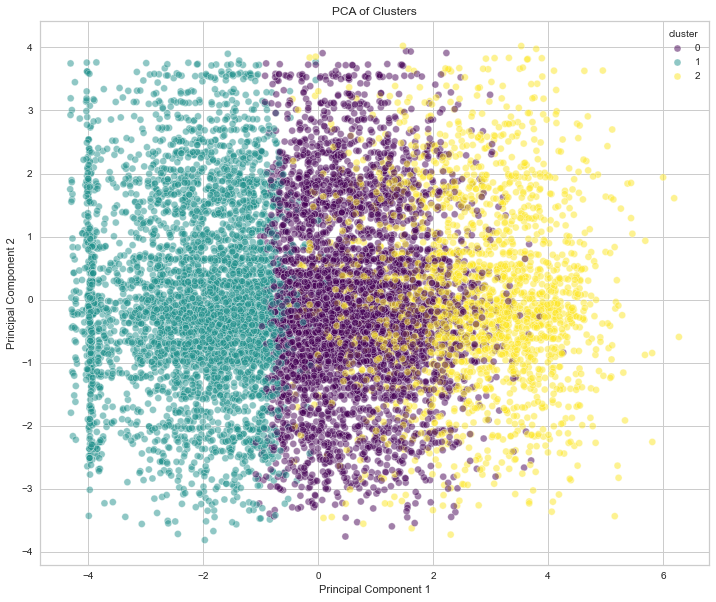

In [129]:
# Scatter plot of the data points of each clusters, colored by their cluster label. 

# Performing PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(StandardScaler().fit_transform(X_new_cleaned))

# Create a DataFrame for plotting
plot_data = X_new_cleaned.assign(
    PC1=X_pca[:, 0],
    PC2=X_pca[:, 1],
    cluster=labels
)

# Scatter plot using Seaborn
fig, ax = plt.subplots(figsize=(12, 10))
sns.scatterplot(
    x="PC1",
    y="PC2",
    hue="cluster",
    data=plot_data,
    palette="viridis",
    alpha=0.5,
    ax=ax
)
plt.title("PCA of Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


- Each cluster data points to be tightly compact to each other to determine the high similarity within each clusters.
- As we can observe from the PCA ploted graph above that it is well seperated with minimal overlaps. So, our selection is good enough to be considered.

In [135]:
# Fitting and getting 3 clusters, from the book code ml_pocket_reference chapter 18.

from sklearn.cluster import (
    AgglomerativeClustering,
)
ag = AgglomerativeClustering(
    n_clusters=3,
    affinity="euclidean",
    linkage="ward",
)
ag.fit(X_new_cleaned)

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [134]:
# Getting 3 clusters, from the book code ml_pocket_reference chapter 18.

km = KMeans(n_clusters=3)
km.fit(X_new_cleaned)
labels = km.predict(X_new_cleaned)
(
    X_new_cleaned.assign(cluster=labels)
    .groupby("cluster")
    .agg(["mean", "var"])
    .T
)

cluster                              0         1         2
Administrative          mean  0.473801 -0.891020  0.751742
                        var   0.690306  0.143049  0.733247
Administrative_Duration mean  0.506536 -0.906718  0.716184
                        var   0.682049  0.151363  0.669089
Informational           mean -0.482416 -0.464428  1.912052
...                                ...       ...       ...
TrafficType_13          var   0.052371  0.059074  0.054494
TrafficType_20          mean  0.015553  0.016667  0.014244
                        var   0.015314  0.016392  0.014047
Weekend_True            mean  0.239083  0.227778  0.236280
                        var   0.181958  0.175933  0.180527

[96 rows x 3 columns]

----

<b> [Back to Content](#Content) </b>

## 8. Post-Clustering EDA

----

<b> [Back to Content](#Content) </b>

## 9. Clustering Output vs. Actual Labels

In [136]:
# Add the K-Means cluster labels as a new column to the original DataFrame
X_new_cleaned['Group'] = labels

X_final = X_new_cleaned.copy()

   Administrative  Administrative_Duration  Informational  \
0       -0.998474                -1.005468      -0.523851   
1       -0.998474                -1.005468      -0.523851   
2        1.028024                 0.645929       1.953214   
3        1.028024                 1.042201      -0.523851   
4        0.074401                 0.815576       1.807721   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.494799       -0.646027                -0.561448   
1               -0.494799       -0.187754                 0.385065   
2                2.057857       -1.169325                -0.949215   
3               -0.494799       -0.074970                 0.067646   
4                1.954424        0.343610                 0.082308   

   BounceRates  ExitRates  PageValues  SpecialDay  ...  TrafficType_4  \
0    -0.802948  -0.002360    1.972236    -0.33763  ...            0.0   
1     0.484472   0.694170   -0.532801    -0.33763  ...            

In [139]:
# Display the first few rows to confirm
X_final.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_8,TrafficType_10,TrafficType_11,TrafficType_13,TrafficType_20,Weekend_True,Group
0,-0.998474,-1.005468,-0.523851,-0.494799,-0.646027,-0.561448,-0.802948,-0.002360,1.972236,-0.33763,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,-0.998474,-1.005468,-0.523851,-0.494799,-0.187754,0.385065,0.484472,0.694170,-0.532801,-0.33763,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1.028024,0.645929,1.953214,2.057857,-1.169325,-0.949215,-0.802948,-0.567724,-0.532801,-0.33763,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,1.028024,1.042201,-0.523851,-0.494799,-0.074970,0.067646,-0.802948,-0.903786,-0.532801,-0.33763,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.074401,0.815576,1.807721,1.954424,0.343610,0.082308,-0.802948,-1.493604,-0.532801,-0.33763,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5,1.028024,0.704288,-0.523851,-0.494799,1.455886,2.114749,-0.559320,-0.715520,-0.532801,-0.33763,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,1.509501,1.343045,1.953214,2.061378,1.614193,1.310673,-0.454232,-1.101076,1.821045,-0.33763,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
7,0.074401,-1.005468,-0.523851,-0.494799,0.115887,1.008703,-0.802948,-0.228256,1.901649,-0.33763,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,0.834177,0.245285,-0.523851,-0.494799,-0.751231,-1.029806,-0.802948,-0.427366,-0.532801,-0.33763,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
9,1.372224,1.416013,-0.523851,-0.494799,-1.007465,-0.482951,-0.311566,0.830646,-0.532801,-0.33763,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
# Loading the data of label from the github repository DAV-6150.

df_label = pd.read_csv("https://raw.githubusercontent.com/bitterlein-biju/DAV-6150-/refs/heads/main/Project2_Data.csv")


X_final_w_label = 

----

<b> [Back to Content](#Content) </b>

## 10. KNN Modeling

----

<b> [Back to Content](#Content) </b>

## 11. Select Models

----

<b> [Back to Content](#Content) </b>

## 12. Clustering vs. KNN Output

----

<b> [Back to Content](#Content) </b>

## Conclusion

<b> [TOP⬆️](#Clustering-+-KNN-to-Predict-Online-Purchases) </b>

---
<h3><center>THE END</center></h3>

===================================================================================================================